# Movie Analysis- IMDb 5000

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./movie_metadata.csv')
print(df.shape)
plt.rcParams["figure.figsize"] = (12,12)

(5043, 28)


## Part 1
How have genres change over time?

(3789, 4)


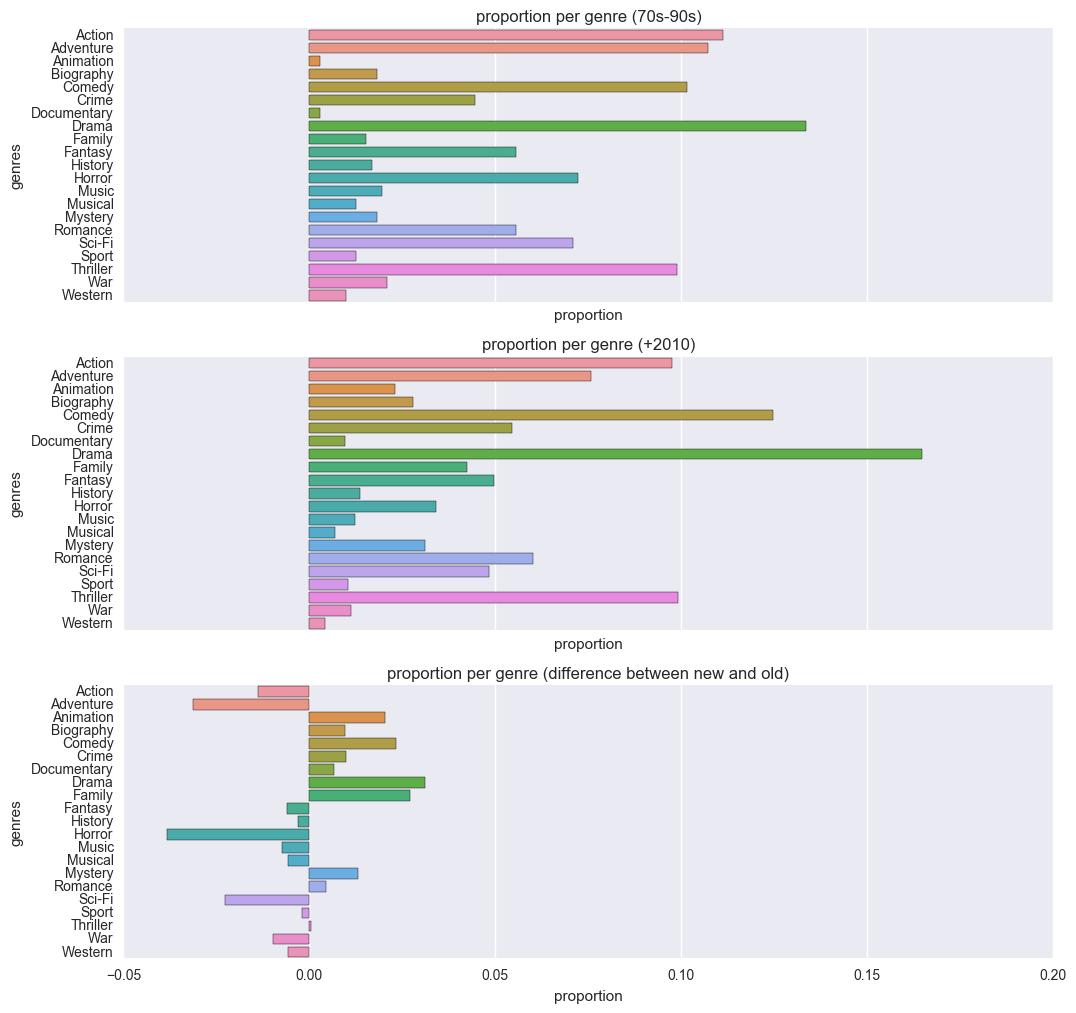

In [18]:
df = df.drop_duplicates(['movie_title'])
df_clean = df[['budget', 'genres', 'gross', 'title_year']].dropna()
df_clean.title_year= df_clean.title_year.astype(np.int16)
print(df_clean.shape)

dfold= df_clean[(df_clean.title_year>=1970) & (df_clean.title_year<1990)]
dfnew= df_clean[df_clean.title_year>=2010]

#Part 1. 
df_genreold = pd.DataFrame(columns = ['genre', 'cgenres', 'budget', 'gross', 'year'])
def genreRemap(row):
    global df_genreold
    d = {}
    genres = np.array(row['genres'].split('|'))
    n = genres.size
    d['budget'] = [row['budget']]*n
    d['gross'] = [row['gross']]*n
    d['year'] = [row['title_year']]*n
    d['genre'], d['cgenres'] = [], []
    for genre in genres:
        d['genre'].append(genre)
        d['cgenres'].append(genres[genres != genre])
    df_genreold = df_genreold.append(pd.DataFrame(d), ignore_index = True)
dfold.apply(genreRemap, axis = 1) #populates df_genre dataset

df_genrenew = pd.DataFrame(columns = ['genre', 'cgenres', 'budget', 'gross', 'year'])
def genreRemap(row):
    global df_genrenew
    d = {}
    genres = np.array(row['genres'].split('|'))
    n = genres.size
    d['budget'] = [row['budget']]*n
    d['gross'] = [row['gross']]*n
    d['year'] = [row['title_year']]*n
    d['genre'], d['cgenres'] = [], []
    for genre in genres:
        d['genre'].append(genre)
        d['cgenres'].append(genres[genres != genre])
    df_genrenew = df_genrenew.append(pd.DataFrame(d), ignore_index = True)
dfnew.apply(genreRemap, axis = 1) #populates df_genre dataset

genre_count1 = df_genreold['genre'].value_counts().sort_index()
genre_count1 /= genre_count1.sum()
df_gCountold = pd.DataFrame({'genre': genre_count1.index, 'count': genre_count1.values})

genre_count2 = df_genrenew['genre'].value_counts().sort_index()
genre_count2 /= genre_count2.sum()
df_gCountnew = pd.DataFrame({'genre': genre_count2.index, 'count': genre_count2.values})

genre_count3= genre_count2-genre_count1
df_gCountdiff= pd.DataFrame({'genre': genre_count3.index, 'count': genre_count3.values})

f, (ax1,ax2,ax3) = plt.subplots(3, sharex=True)
f.size= (10,6)
sns.barplot(x = 'count', y = 'genre', data = df_gCountold, ax=ax1)
ax1.set_title('proportion per genre (70s-90s)')
ax1.set_xlabel('proportion')
ax1.set_ylabel('genres')
sns.barplot(x = 'count', y = 'genre', data = df_gCountnew, ax=ax2)
ax2.set_title('proportion per genre (+2010)')
ax2.set_xlabel('proportion')
ax2.set_ylabel('genres')
sns.barplot(x = 'count', y = 'genre', data = df_gCountdiff, ax=ax3)
ax3.set_title('proportion per genre (difference between new and old)')
ax3.set_xlabel('proportion')
ax3.set_ylabel('genres')

## Part 2

Are movies worse now than they used to be?

/mnt/hdd/code/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


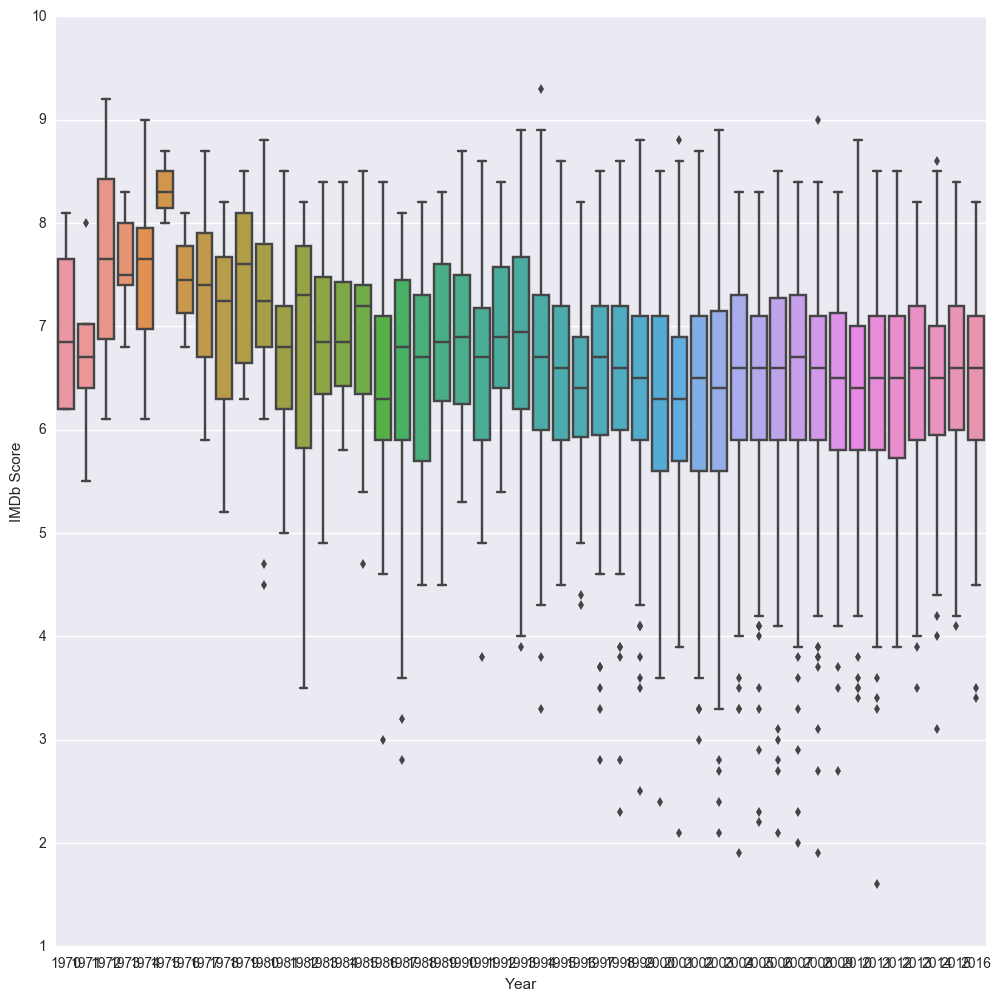

In [23]:
    df_time = df[['title_year', 'imdb_score', 'gross']].dropna()
    df_time.title_year= df_time.title_year.astype(np.int16)

    df_time= df_time[df_time.title_year>=1970]
    sns.boxplot(df_time.imdb_score, groupby= df_time.title_year)
    plt.xlabel("Year")
    plt.ylabel("IMDb Score")